<a href="https://colab.research.google.com/github/profteachkids/StemUnleashed/blob/main/TitrationCurvesRigorous.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
import numpy as np
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt

In [190]:
#CH3COOH (1) <-> CH3COO- (2) + H+ (3)  pKa = 4.76       e1
#NaOH -> Na+ (4) + OH- (5)                              e2
#H2O (6) <-> H+ (3) + OH- (5)          pKw=14           e3


In [228]:
c_CH3COOH = 0.1   #mol/L
c_NaOH = 0.1        #mol/L

v_init = 0.1    #L
n_CH3COOH = c_CH3COOH * v_init

def KwEq(pH, n_CH3COOH, n_NaOH, V):
    r21 = 10**(-(4.76 - pH))        #n2/n1
    n1 = n_CH3COOH/(1+r21)
    e1 = n_CH3COOH - n1
    e2 = n_NaOH

    c3 = 10**(-pH)
    e3 = V*c3 - e1
    c5 = (e2+e3)/V
    return c3*c5/1e-14 - 1.


v_NaOHs = np.linspace(0,0.2,100)
pH=[]
for v_NaOH in v_NaOHs:
    n_NaOH = v_NaOH * c_NaOH
    v = v_init+v_NaOH
    pH.append(root_scalar(lambda pH: KwEq(pH, n_CH3COOH, n_NaOH, v),method='brentq',bracket=[-1,15]).root)

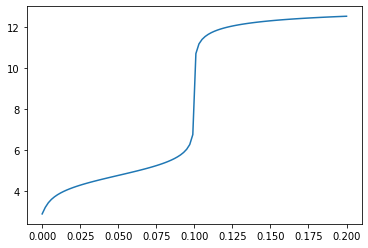

In [229]:
fig,ax = plt.subplots()
ax.plot(v_NaOHs,pH)

In [193]:
KwEq(res.root,n_CH3COOH, n_NaOH, v)

2.1116441928370477e-13

In [194]:
#CH3COOH (1) <-> CH3COO- (2) + H+ (6)  pKa = 4.76       e1
#H2CO3 (3) <-> HCO3- (4) + H+ (6)       pKa = 6.37      e2
#HCO3- (4) <-> CO3- (5) + H+ (6)       pKa = 10.32      e3
#H2O -> H+ (6) + OH- (7)                pKw = 14        e4

In [235]:
def KwEqH2CO3(pH, n_CH3COOH, n_HCO3, V):
    r21 = 10**(-(4.76 - pH))        #n2/n1
    r43 = 10**(-(6.37-pH))          #n4/n3
    r54 = 10**(-(10.32-pH))         #n5/n4

    n1 = n_CH3COOH/(1+r21)
    e1 = n_CH3COOH - n1

    # n3 + n4 + n5 = n_HCO3
    # n3 + r43*n3 + r54*r43*n3 = n_HCO3

    n3 = n_HCO3/(1+r43+r54)
    n4 = r43*n3
    n5 = r54*n4

    e2 = n4 - n_HCO3
    e3 = n5

    c6 = 10**(-pH)
    e4 = V*c6 - e1 - e2 - e3
    c7 = e4/V

    return c6*c7- 1e-14


In [257]:
root_scalar(lambda pH: KwEqH2CO3(pH, 0.1, 10 ,0.1),method='brentq',bracket=[-1,15])

      converged: True
           flag: 'converged'
 function_calls: 16
     iterations: 15
           root: 8.145968911715219

In [244]:
c_CH3COOH = 0.1 #mol/L
c_HCO3 = 0.1 #mol/L
V_init = 0.1 #L

n_CH3COOH = c_CH3COOH * V_init

v_HCO3s = np.linspace(0,0.5,100)

pH=[]
for v_HCO3 in v_HCO3s:
    V=V_init+v_HCO3
    n_HCO3 = c_HCO3*v_HCO3
    pH.append(root_scalar(lambda x: KwEqH2CO3(x, n_CH3COOH, n_HCO3,V),method='brentq',bracket=[-1,15]).root)

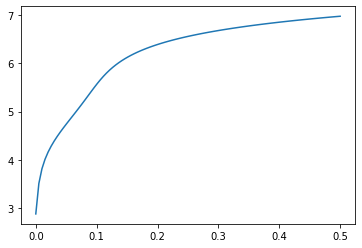

In [245]:
fig,ax = plt.subplots()
ax.plot(v_HCO3s, pH)

In [ ]:
pH